# Multi-Target TOPSIS 
## Examplary usage for assessment of realization of Europe 2020 strategy

Import some Python packages.

In [1]:
import numpy as np
import pandas as pd
import copy
import os
import matplotlib.pyplot as plt
import seaborn as sns

Import some methods from `pyrepo-mcda` Python 3 open-source library, which can be downloaded from https://pypi.org/project/pyrepo-mcda/ and installed via pip with the command: pip install pyrepo-mcda

In [2]:
from pyrepo_mcda import normalizations as norms
from pyrepo_mcda import correlations as corrs
from pyrepo_mcda import weighting_methods as mcda_weights
from pyrepo_mcda.additions import rank_preferences
from pyrepo_mcda.mcda_methods import SPOTIS, VIKOR

Import some methods from files provided in this repo.

In [3]:
from create_dictionary import Create_dictionary
from target_compensation import target_compensation
from visualizations import *
from normalizations import targeted_minmax_normalization
from topsis import TOPSIS, TOPSIS_TARGETED

Set the path to your data files.

In [4]:
path = 'DATASET/'

Load the data. You can consider criterion C10, but there are no complete data for it in Eurostat, so if you wish to perform a comprehensive assessment of all countries provided in this database, set flag_C10 as False

In [5]:
# assessment for 2020
year = '2020'
data = pd.read_csv(os.path.join(path, 'data_' + year + '.csv'), index_col = 'Country')
data_target = pd.read_csv(os.path.join(path, 'target.csv'), index_col = 'Country')
# is criterion C10 taken into account?
flag_C10 = False

# :-1 without C10 columns
if flag_C10 == False:
    df_data = data.iloc[:len(data) - 1, :-1]
    types = data.iloc[len(data) - 1, :-1].to_numpy()
    data_target = data_target.iloc[:, :-1]
    idx_nan = []
    lastC = 'C9'
else:
    df_data = data.iloc[:len(data) - 1, :]
    types = data.iloc[len(data) - 1, :].to_numpy()
    idx_nan = list(np.where(data_target['C10'].isnull())[0])
    lastC = 'C10'


lan = pd.read_csv('./DATASET/symbols.csv', index_col='Country')
list_alt_names = lan['Symbol']

if flag_C10 == True:
    df_data = df_data.reset_index()
    df_data = df_data.drop(idx_nan)
    df_data = df_data.set_index('Country')

    data_target = data_target.reset_index()
    data_target = data_target.drop(idx_nan)
    data_target = data_target.set_index('Country')


matrix = df_data.to_numpy()
matrix_target_raw = data_target.to_numpy()
matrix_target = target_compensation(matrix, matrix_target_raw, types)

Calculate criteria weights for decision matrix and preference values for countries using MT-TOPSIS and other benchmarking MCDA methods. Then calculate the ranking of considered countries.

In [6]:
# calculate criteria weights with CRITIC weighting method
weights = mcda_weights.critic_weighting(matrix)

pref_results = pd.DataFrame()
pref_results['Ai'] = list(list_alt_names)

rank_results = pd.DataFrame()
rank_results['Ai'] = list(list_alt_names)

#TOPSIS targeted
topsis_targeted = TOPSIS_TARGETED(normalization_method = targeted_minmax_normalization)
pref = topsis_targeted(matrix, matrix_target, weights, types)
rank = rank_preferences(pref, reverse = True)
pref_results['MT-TOPSIS'] = pref
rank_results['MT-TOPSIS'] = rank

# classic methods based on reference solutions
# TOPSIS
topsis = TOPSIS(normalization_method = norms.minmax_normalization)
pref = topsis(matrix, weights, types)
rank = rank_preferences(pref, reverse = True)
pref_results['TOPSIS'] = pref
rank_results['TOPSIS'] = rank

#SPOTIS
bounds_min = np.amin(matrix, axis = 0)
bounds_max = np.amax(matrix, axis = 0)
bounds = np.vstack((bounds_min, bounds_max))
spotis = SPOTIS()
pref = spotis(matrix, weights, types, bounds)
rank = rank_preferences(pref, reverse = False)
pref_results['SPOTIS'] = pref
rank_results['SPOTIS'] = rank

#VIKOR
vikor = VIKOR(normalization_method = norms.minmax_normalization)
pref = vikor(matrix, weights, types)
rank = rank_preferences(pref, reverse = False)
pref_results['VIKOR'] = pref
rank_results['VIKOR'] = rank

pref_results = pref_results.set_index('Ai')

rank_results = rank_results.set_index('Ai')

Display preference values for countries calculated by MCDA methods. Note that for MT-TOPSIS and TOPSIS, the best scored alternative has the highest preference values. On the other hand, for SPOTIS and VIKOR, the best alternative has the lowest preference value.

In [7]:
pref_results

,MT-TOPSIS,TOPSIS,SPOTIS,VIKOR
Ai,,,,
BE,0.907557,0.579401,0.375688,0.594683
BG,0.855021,0.492045,0.471280,0.641599
CZ,0.922392,0.571790,0.377174,0.518886
DK,0.947489,0.717907,0.240931,0.160907
DE,0.897314,0.463096,0.579569,0.675462
EE,0.860459,0.669638,0.266426,0.216376
IE,0.835243,0.576649,0.376091,0.565513
EL,0.781819,0.515772,0.447485,0.692900
ES,0.646933,0.361282,0.645242,0.865399


Display MCDA rankings of considered countries.

In [8]:
rank_results

,MT-TOPSIS,TOPSIS,SPOTIS,VIKOR
Ai,,,,
BE,10,10,10,15
BG,17,21,20,20
CZ,6,12,12,10
DK,2,3,3,3
DE,12,24,25,22
EE,16,5,5,4
IE,19,11,11,13
EL,24,18,17,23
ES,27,26,26,25


Compare visual rankings of MT-TOPSIS and TOPSIS. They are quite different because both methods consider the goals differently.

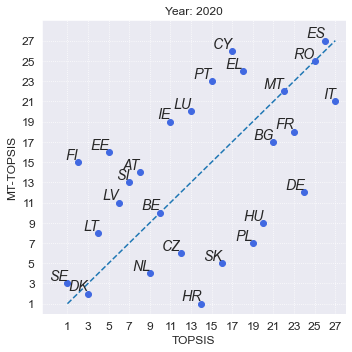

In [9]:
names = ['TOPSIS']
model_compare = []
for name in names:
    model_compare.append([name, 'MT-' + name])

data = copy.deepcopy(rank_results)
sns.set_style("darkgrid")
plot_scatter(data = data, model_compare = model_compare, lastC = lastC, year = year)

Compare visual results with other classical MCDA methods: SPOTIS and VIKOR.

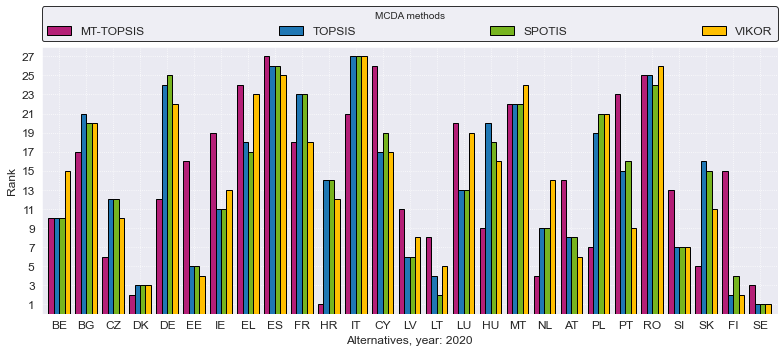

In [10]:
#bar chart
df_plot = copy.deepcopy(rank_results)
colors = ['#b41f77', '#1f77b4', '#77b41f', '#FFBF00']
plot_barplot(df_plot, df_plot.index, colors = colors, lastC = lastC, year = year)

Compare rankings objectively using two correlation coefficients: $r_w$ and Pearson. High correlation values close to 1 confirm a strong correlation of compared pair of rankings.

In [11]:
# Correlations
data = copy.deepcopy(rank_results)
method_types = list(data.columns)

dict_new_heatmap_rw = Create_dictionary()

for el in method_types:
    dict_new_heatmap_rw.add(el, [])

dict_new_heatmap_pearson = copy.deepcopy(dict_new_heatmap_rw)

# heatmaps for correlations coefficients
for i in method_types[::-1]:
    for j in method_types:
        dict_new_heatmap_rw[j].append(corrs.weighted_spearman(data[i], data[j]))
        dict_new_heatmap_pearson[j].append(corrs.pearson_coeff(data[i], data[j]))


df_new_heatmap_rw = pd.DataFrame(dict_new_heatmap_rw, index = method_types[::-1])
df_new_heatmap_rw.columns = method_types

df_new_heatmap_pearson = pd.DataFrame(dict_new_heatmap_pearson, index = method_types[::-1])
df_new_heatmap_pearson.columns = method_types

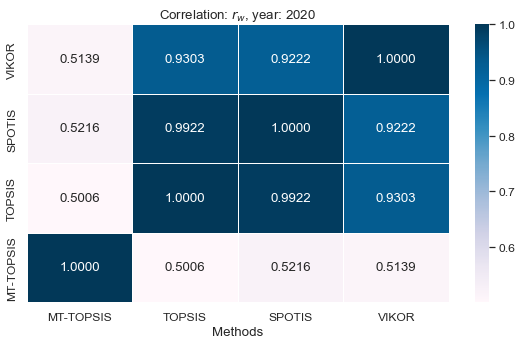

In [12]:
# correlation matrix with rw coefficient
draw_heatmap(df_new_heatmap_rw, r'$r_w$', lastC, year = year)

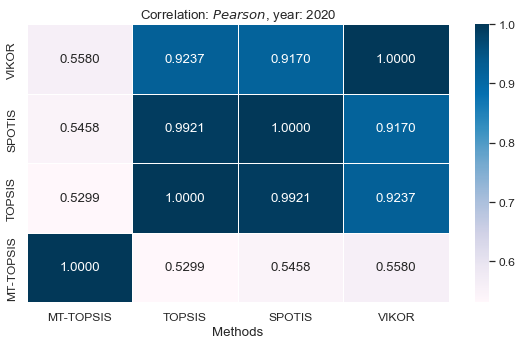

In [13]:
# correlation matrix with Pearson coefficient
draw_heatmap(df_new_heatmap_pearson, r'$Pearson$', lastC, year = year)